In [94]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf
import random
import os
import joblib
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import resample
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
# from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [3]:
df = df.drop(columns=['X16']) # Same as X9

In [4]:
print(df['status_label'].value_counts())

status_label
alive     73462
failed     5220
Name: count, dtype: int64


# Simple Neural Network

## Set seeds

In [5]:
# Set a fixed seed for reproducibility
SEED = 99

# 1. Set NumPy seed
np.random.seed(SEED)

# 2. Set Python's built-in random seed
random.seed(SEED)

# 3. Set TensorFlow seed
tf.random.set_seed(SEED)

# 4. Ensure TensorFlow runs deterministically
os.environ['PYTHONHASHSEED'] = str(SEED)
tf.config.experimental.enable_op_determinism()


## Convert X data into ratios relative to total assets

In [6]:
cols = df.columns.difference(["company_name", "status_label", "year"])

df[cols] = df[cols].div(df['X10'],axis=0)

df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X17,X18
0,C_1,alive,1999,0.689971,1.124304,0.024795,0.120150,0.453467,0.047454,0.173210,0.503040,1.382369,1.0,0.243519,0.095355,0.258065,0.221075,0.271291,0.541814,1.262219
1,C_1,alive,2000,0.692247,1.017036,0.026468,0.091710,0.456776,0.026403,0.164118,0.537317,1.245637,1.0,0.256445,0.065241,0.228600,0.178658,0.290751,0.515267,1.153927
2,C_1,alive,2001,0.614836,0.741309,0.031676,0.038309,0.403532,-0.082989,0.109164,0.513367,0.899355,1.0,0.306532,0.006633,0.158046,0.211862,0.196569,0.563172,0.861046
3,C_1,alive,2002,0.577337,0.723466,0.039574,0.044777,0.378599,-0.018074,0.096592,0.208746,0.883074,1.0,0.239809,0.005204,0.159608,0.296488,0.180749,0.570377,0.838297
4,C_1,alive,2003,0.609346,0.737781,0.037615,0.066955,0.348580,0.004940,0.147557,0.435515,0.919167,1.0,0.350583,0.029341,0.181387,0.185059,0.185938,0.574669,0.852212


## Split into train and test sets using Train-Test-Split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.15, stratify=df['status_label'], random_state=99)
print(df_train['status_label'].value_counts())
print(df_test['status_label'].value_counts())
df_train.head()

status_label
alive     62442
failed     4437
Name: count, dtype: int64
status_label
alive     11020
failed      783
Name: count, dtype: int64


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X17,X18
9883,C_821,alive,2017,0.147445,0.155654,0.049694,0.097573,0.000000,0.050187,0.026780,0.816364,0.304065,1.0,0.115756,0.047880,0.148411,0.038747,0.466160,0.338861,0.206491
15246,C_1254,alive,2016,0.398343,0.228912,0.030578,0.126560,0.015886,0.015899,0.231188,0.483167,0.583604,1.0,0.471191,0.095983,0.354692,0.398761,0.713981,1.017759,0.457044
76939,C_8636,alive,2015,0.208366,1.006434,0.057479,0.126114,0.000000,0.002889,0.136754,0.799647,1.285710,1.0,0.604914,0.068634,0.279275,0.151790,-0.147112,0.885932,1.159596
25653,C_2255,alive,1999,0.744802,0.090868,0.043129,0.257418,0.001661,0.072469,0.087226,2.144284,0.877930,1.0,0.028570,0.214289,0.787062,0.248859,-0.716487,0.311035,0.620511
51329,C_5427,alive,2017,0.124345,0.425878,0.025707,0.147672,0.009045,0.073503,0.088641,1.265938,0.733981,1.0,0.356850,0.121965,0.308102,0.100638,0.675045,0.520613,0.586309


In [8]:
df.groupby("year")["status_label"].value_counts(normalize=True).unstack()

status_label,alive,failed
year,,
1999,0.928410,0.071590
2000,0.922694,0.077306
2001,0.915458,0.084542
2002,0.910987,0.089013
2003,0.906045,0.093955
2004,0.907084,0.092916
2005,0.909869,0.090131
2006,0.911337,0.088663
2007,0.916189,0.083811


In [9]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
contingency_table = pd.crosstab(df["year"], df["status_label"])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


Chi-Square Statistic: 731.2001247028753, P-value: 8.730479710760694e-143


Year is a significant factor in determining status_label. However, since we lack additional context such as the economic conditions of specific years, we aim to prevent the model from overfitting to time-based patterns. Instead, we want it to generalise well across different time periods and economic conditions. Therefore, we use random splitting with train_test_split rather than splitting by year. Additionally, we enable stratified sampling to ensure that the number of instances in the 'Failed' class is balanced across the training, validation, and test sets.

### Split into X and y data

In [92]:
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year", "X10"]) # drop X10 since it is all 1

y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label", "year", "X10"])

## Define function

- 'class_weight' allows for recommended class weights from sklearn
- 'verbose' shows training information
- 'plot' plots confusion matrix for best model
- Default (model_type) is 3 Hidden layers: 128->64->32
- Uses 5-fold cross validation, 4 folds for training 1 fold for validation, every loop will test directly on test set to select the best model (keras uses a validation set to train and shows val_accuracy as well if verbose = 1, no need to evaluate on validation set, and we will select the best predictions on the test set anyways)

In [28]:
def train_nn(df_train, df_test, verbose=0, plot=1, model_type=2, n_folds=5, class_weight=False):
    le = LabelEncoder()
    y_test_encoded = le.fit_transform(df_test['status_label'])
    X_test = df_test.drop(columns=["status_label", "company_name", "year", "X10"])
    
    # Create Stratified K-Folds
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=99)
    
    # Store results for each fold
    recall_scores = []
    accuracy_scores = []
    classification_reports = []
    harmonic_means = []
    
    best_model = None
    best_harmonic_mean = -np.inf  # Start with a very low value for the best harmonic mean
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(df_train, df_train['status_label'])):
        
        print(f"Fold {fold + 1}/{n_folds}")
        
        # Split data into train and validation sets for this fold
        df_train_fold = df_train.iloc[train_idx]
        df_val_fold = df_train.iloc[val_idx]
        
        # Split into X and y variables
        X_train = df_train_fold.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
        y_train_encoded = le.transform(df_train_fold["status_label"])
        X_val = df_val_fold.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
        y_val_encoded = le.transform(df_val_fold["status_label"])

        if class_weight:
            # Calculate class weights
            class_weights = compute_class_weight(
                class_weight='balanced', 
                classes=np.unique(y_train_encoded), 
                y=y_train_encoded
            )
            
            class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
            print(f"Class Weights for Fold {fold + 1}: {class_weight_dict}")
        else:
            class_weight_dict = {0: 1.0, 1: 1.0}
        
        model = None                                                                                                        
        
        # Define the neural network model
        if model_type == 1:
            model = Sequential([
                Dense(64, activation='relu', input_dim=(X_train.shape[1])),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(32, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(1, activation='sigmoid')  # Binary classification output
            ])
        elif model_type == 2:
            model = Sequential([
                Dense(128, activation='relu', input_dim=(X_train.shape[1])),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(64, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(32, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(1, activation='sigmoid')  # Binary classification output
            ])
        elif model_type == 3:
            model = Sequential([
                Dense(256, activation='relu', input_dim=(X_train.shape[1])),
                BatchNormalization(),
                Dropout(0.3),
            
                Dense(128, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(64, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(32, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                
                Dense(1, activation='sigmoid')  # Binary classification output
            ])
            
        # Train neural network
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        
        model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), 
                  callbacks=[early_stopping], verbose=verbose, class_weight=class_weight_dict)
        
        # Find best threshold for classification
        y_pred_probs = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)  # Get FPR, TPR, and thresholds
        optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
        optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold
        
        print(f"Optimal Threshold for Fold {fold + 1}: {optimal_threshold}")
        
        y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold
        
        # Calculate recall and accuracy for this fold
        recall = recall_score(y_test_encoded, y_pred)
        accuracy = accuracy_score(y_test_encoded, y_pred)
        
        # Calculate harmonic mean of recall and accuracy
        harmonic_mean = 2 * (recall * accuracy) / (recall + accuracy)

        print(f"Classification Report for Fold {fold + 1} with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
        print(f"Confusion Matrix for Fold {fold + 1}:")
        print("Harmonic mean of Recall and Accuracy: ", harmonic_mean)
        print(confusion_matrix(y_test_encoded, y_pred))
            
        
        # Track the best model based on the highest harmonic mean
        if harmonic_mean > best_harmonic_mean:
            best_harmonic_mean = harmonic_mean
            best_model = model  # Store the best model
        
        # Store metrics for reporting
        recall_scores.append(recall)
        accuracy_scores.append(accuracy)
        classification_reports.append(classification_report(y_test_encoded, y_pred, output_dict=True))
        harmonic_means.append(harmonic_mean)

    # After cross-validation, calculate the average performance across all folds
    avg_recall = np.mean(recall_scores)
    avg_accuracy = np.mean(accuracy_scores)

    print(f"\nAverage Recall across {n_folds} folds: {avg_recall}")
    print(f"Average Accuracy across {n_folds} folds: {avg_accuracy}")
    print(f"\nMaximum Harmonic Mean of Recall and Accuracy across {n_folds} folds: {np.max(harmonic_means)}")
    
    if plot:
        # Find best threshold for classification
        y_pred_probs = best_model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)  # Get FPR, TPR, and thresholds
        optimal_idx = (tpr - fpr).argmax()  # Find the threshold with the maximum difference between TPR and FPR
        optimal_threshold = thresholds[optimal_idx]  # Get optimal threshold
        
        print(f"Optimal Threshold for Best Model: {optimal_threshold}")
        
        y_pred = (y_pred_probs >= optimal_threshold).astype(int)  # Apply the threshold
        print(f"Classification Report for Best Model with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
        print(f"Confusion Matrix for Best Model:")
        sns.heatmap(confusion_matrix(y_test_encoded, y_pred), annot=True, fmt=".0f", annot_kws={"size": 18})

    return best_model  # Return the best model based on the highest harmonic mean of recall and accuracy


## No balancing

### Keras

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
Optimal Threshold for Fold 1: 0.05378285050392151
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.12      0.67      0.20       783

    accuracy                           0.65     11803
   macro avg       0.54      0.66      0.49     11803
weighted avg       0.91      0.65      0.74     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6596905852418972
[[7153 3867]
 [ 259  524]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
Optimal Threshold for Fold 2: 0.04336890950798988
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.59      0.73     11020
           1       0.11      0.70      0.19       783

    accuracy                           0.60     11803
   macro avg       0.

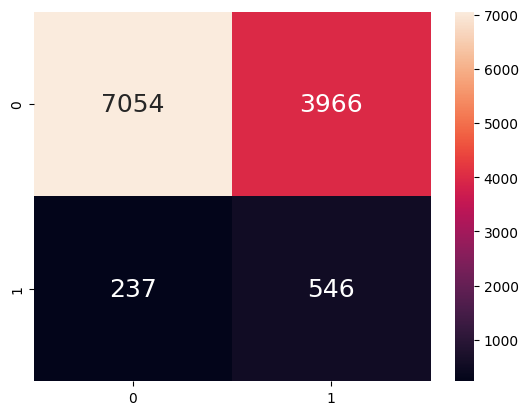

In [29]:
model_unbalanced = train_nn(df_train, df_test)

In [63]:
# save model
model_unbalanced.save("model_unbalanced.keras")

## Keras with class weights

Fold 1/5
Class Weights for Fold 1: {0: 0.5355334013973134, 1: 7.535633802816902}
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
Optimal Threshold for Fold 1: 0.4419666528701782
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.12      0.67      0.20       783

    accuracy                           0.65     11803
   macro avg       0.54      0.66      0.49     11803
weighted avg       0.91      0.65      0.74     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.663433933523358
[[7178 3842]
 [ 255  528]]
Fold 2/5
Class Weights for Fold 2: {0: 0.5355334013973134, 1: 7.535633802816902}
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step
Optimal Threshold for Fold 2: 0.340806782245636
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.62      0.76 

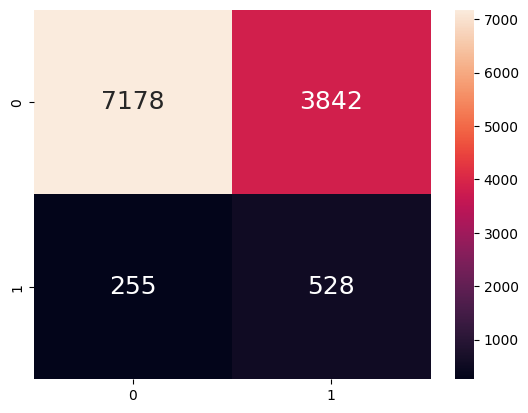

In [64]:
nn_weighted = train_nn(df_train, df_test, class_weight=True)

In [91]:
# save model
nn_weighted.save("nn_weighted.keras")

## Balancing dataset

In [22]:
print("Train set:")
print(df_train['status_label'].value_counts())

print("\nTest set: ")
print(df_test['status_label'].value_counts())


Train set:
status_label
alive     62442
failed     4437
Name: count, dtype: int64

Test set: 
status_label
alive     11020
failed      783
Name: count, dtype: int64


### Undersample Majority class in train set

#### Trying different integer ratios of Majority class : Minority class

##### Defining a Function to undersample and train model

In [30]:
def undersample(df_train, df_test, n_folds=5, n=1, verbose=0, plot=1):
        
    # Perform undersampling on the training data
    df_majority = df_train[df_train.status_label == "alive"]
    df_minority = df_train[df_train.status_label == "failed"]
    
    # Downsample majority class
    df_majority_downsampled = resample(
        df_majority, 
        replace=False, 
        n_samples=n * len(df_minority), 
        random_state=99
    )
    
    df_balanced = pd.concat([df_majority_downsampled, df_minority])

    model = train_nn(df_balanced, df_test, n_folds=n_folds, verbose=verbose, plot=plot)
    return model
        
       

##### 1:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
Optimal Threshold for Fold 1: 0.45747020840644836
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71     11020
           1       0.11      0.75      0.19       783

    accuracy                           0.58     11803
   macro avg       0.54      0.66      0.45     11803
weighted avg       0.91      0.58      0.68     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.65137320026947
[[6200 4820]
 [ 195  588]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
Optimal Threshold for Fold 2: 0.4339887201786041
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.77     11020
           1       0.12      0.68      0.20       783

    accuracy                           0.65     11803
   macro avg       0.54 

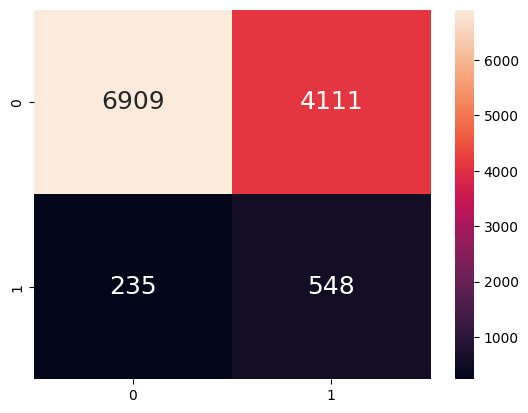

In [65]:
model11 = undersample(df_train, df_test, n=1)

In [76]:
# save model
model11.save("model11.keras")

##### 2:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
Optimal Threshold for Fold 1: 0.2947380542755127
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.58      0.72     11020
           1       0.11      0.73      0.19       783

    accuracy                           0.59     11803
   macro avg       0.54      0.65      0.46     11803
weighted avg       0.91      0.59      0.69     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6500135758892208
[[6360 4660]
 [ 213  570]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
Optimal Threshold for Fold 2: 0.36497119069099426
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.59      0.73     11020
           1       0.11      0.71      0.19       783

    accuracy                           0.60     11803
   macro avg       0.5

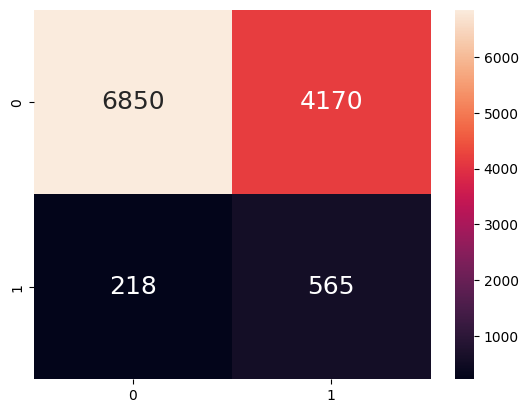

In [77]:
model21 = undersample(df_train, df_test, n=2)

In [82]:
# save model
model21.save("model21.keras")

##### 3:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
Optimal Threshold for Fold 1: 0.2348114252090454
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.55      0.70     11020
           1       0.11      0.79      0.19       783

    accuracy                           0.57     11803
   macro avg       0.54      0.67      0.45     11803
weighted avg       0.92      0.57      0.67     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6586194416016559
[[6078 4942]
 [ 168  615]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
Optimal Threshold for Fold 2: 0.24460673332214355
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.12      0.67      0.20       783

    accuracy                           0.65     11803
   macro avg       0.5

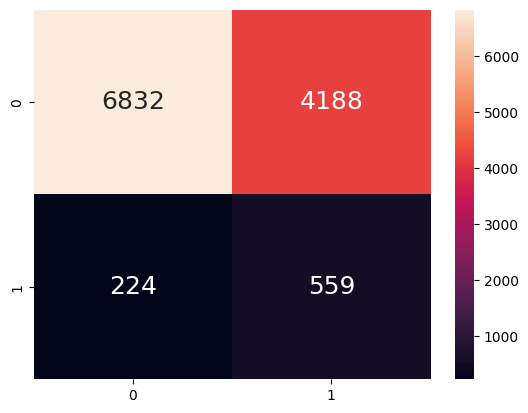

In [78]:
model31 = undersample(df_train, df_test, n=3)

In [83]:
# save model
model31.save("model31.keras")

##### 4:1 ratio

Fold 1/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
Optimal Threshold for Fold 1: 0.18365968763828278
Classification Report for Fold 1 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.55      0.70     11020
           1       0.11      0.79      0.19       783

    accuracy                           0.57     11803
   macro avg       0.54      0.67      0.45     11803
weighted avg       0.92      0.57      0.67     11803

Confusion Matrix for Fold 1:
Harmonic mean of Recall and Accuracy:  0.6595864065576222
[[6051 4969]
 [ 163  620]]
Fold 2/5
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step
Optimal Threshold for Fold 2: 0.18029195070266724
Classification Report for Fold 2 with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.65      0.78     11020
           1       0.13      0.71      0.21       783

    accuracy                           0.65     11803
   macro avg       0.

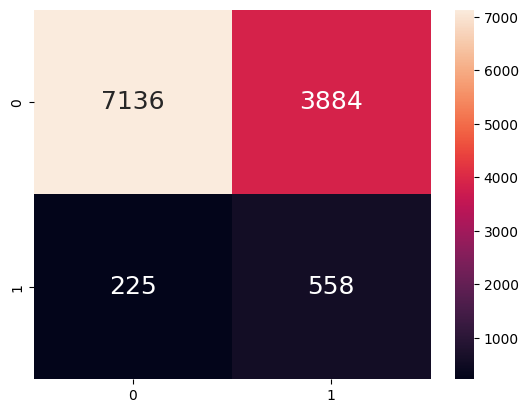

In [79]:
model41 = undersample(df_train, df_test, n=4)

In [84]:
# save model
model41.save("model41.keras")

### Synthetic Minority Over-sampling Technique (SMOTE)

#### Defining a Function to perform smote and train model

In [73]:
def smote_nn(df_train, df_test, n_folds=5, ratio=1, plot=1, verbose=0):
        
    # Split into X and y variables
    X_train = df_train.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
    y_train = df_train["status_label"]  # Target column

    # Define SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=99) 

    # Apply SMOTE only to training data
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

    # Check new class distribution
    print("Before SMOTE:", Counter(y_train))
    print("After SMOTE:", Counter(y_train_oversampled))

    # Convert X_train_oversampled to DataFrame
    X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

    # Add the removed columns back as empty (NaN)
    X_train_oversampled["company_name"] = np.nan
    X_train_oversampled["year"] = np.nan
    X_train_oversampled["X10"] = np.nan
    
    df_oversampled = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)
    model = train_nn(df_oversampled, df_test, n_folds=n_folds, verbose=verbose, plot=plot)
    return model

#### Keras

Before SMOTE: Counter({'alive': 62442, 'failed': 4437})
After SMOTE: Counter({'alive': 62442, 'failed': 62442})
Fold 1/5
Epoch 1/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6073 - loss: 0.7009 - val_accuracy: 0.6352 - val_loss: 0.6657
Epoch 2/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6561 - loss: 0.6251 - val_accuracy: 0.6700 - val_loss: 0.6484
Epoch 3/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6659 - loss: 0.6120 - val_accuracy: 0.6645 - val_loss: 0.6571
Epoch 4/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6739 - loss: 0.6051 - val_accuracy: 0.6759 - val_loss: 0.6479
Epoch 5/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6764 - loss: 0.5997 - val_accuracy: 0.6324 - val_loss: 0.6600
Epoch 6/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6829 - loss: 0.5939 - val_accuracy: 0.6456 - val_loss: 0.6420
Epoch 7/100
3123/3123 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6861 - loss: 0.5896 - va

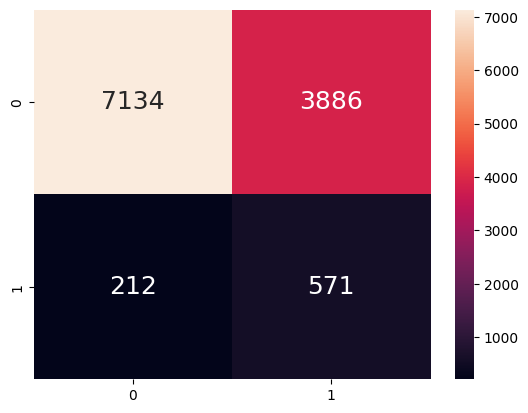

In [57]:
smote_nn1 = smote_nn(df_train, df_test, ratio=1, plot=1, verbose=1)

In [59]:
# save model
smote_nn1.save("smote_nn1.keras")

### Undersampling + Oversampling in train set

In [72]:
def resample_nn(df_train, df_test, n_folds=5, ratio=0.2, plot=1, verbose=0):
        
    # Split into X and y variables
    X_train = df_train.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
    y_train = df_train["status_label"]  # Target column

    # Define SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=99) 

    # Apply SMOTE only to training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check new class distribution
    print("Before SMOTE:", Counter(y_train))
    print("After SMOTE:", Counter(y_train_resampled))

    temp_df = pd.concat([y_train_resampled.to_frame(), X_train_resampled], axis=1)

    df_majority = temp_df[temp_df.status_label == "alive"]
    df_minority = temp_df[temp_df.status_label == "failed"]
    
    # Downsample majority class
    df_majority_downsampled = resample(
        df_majority, 
        replace=False, 
        n_samples=len(df_minority), 
        random_state=99
    )

    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    df_balanced.head()
    df_balanced.info()

    df_balanced = pd.DataFrame(df_balanced, columns=df_train.columns)

    # Add the removed columns back as empty (NaN)
    df_balanced["company_name"] = np.nan
    df_balanced["year"] = np.nan
    df_balanced["X10"] = np.nan

    print("After Resampling:", Counter(df_balanced["status_label"]))
    
    model = train_nn(df_balanced, df_test, n_folds=n_folds, verbose=verbose, plot=plot)
    return model

Before SMOTE: Counter({'alive': 62442, 'failed': 4437})
After SMOTE: Counter({'alive': 62442, 'failed': 12488})
<class 'pandas.core.frame.DataFrame'>
Index: 24976 entries, 32927 to 74929
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  24976 non-null  object 
 1   X1            24976 non-null  float64
 2   X2            24976 non-null  float64
 3   X3            24976 non-null  float64
 4   X4            24976 non-null  float64
 5   X5            24976 non-null  float64
 6   X6            24976 non-null  float64
 7   X7            24976 non-null  float64
 8   X8            24976 non-null  float64
 9   X9            24976 non-null  float64
 10  X11           24976 non-null  float64
 11  X12           24976 non-null  float64
 12  X13           24976 non-null  float64
 13  X14           24976 non-null  float64
 14  X15           24976 non-null  float64
 15  X17           24976 non-null  float64
 16  X

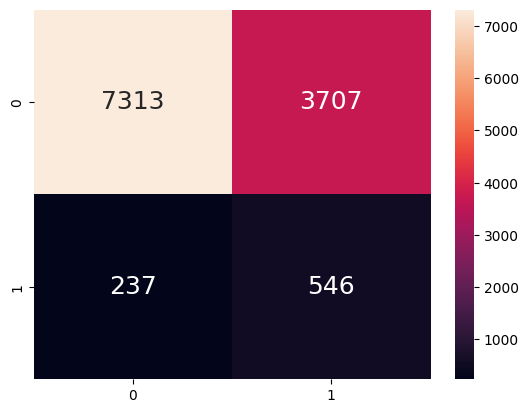

In [74]:
model_resampled = resample_nn(df_train, df_test, verbose=1)

In [81]:
# save model
model_resampled.save("model_resampled.keras")

# Altman's Z-Score Model

## Assume 'Grey' Zone is Alive

In [85]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole dataset

Z_pred
0    50015
1    28667
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     73462
           1       0.10      0.55      0.17      5220

    accuracy                           0.64     78682
   macro avg       0.53      0.60      0.47     78682
weighted avg       0.90      0.64      0.73     78682



<Axes: >

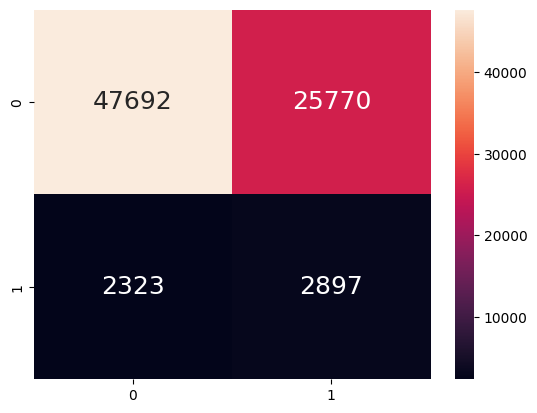

In [86]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 1 if x == 'High' else 0)

# Look at distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Testset only

Z_pred
0    7588
1    4215
Name: count, dtype: int64

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
10362,2015,alive,0.304846,0.264173,0.079361,1.228579,1.231695,2.966390,0
64208,2006,failed,0.678140,-2.484637,-0.395457,1.029008,0.187886,-3.164439,1
25229,2009,alive,0.184705,-2.409985,-0.057392,14.612968,0.335799,5.761854,0
11258,2015,alive,0.012660,0.046027,-0.063681,1.006405,0.231438,0.704763,1
72692,2011,alive,0.346267,0.102495,0.117304,0.635650,1.148085,2.475591,0


Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78     11020
           1       0.10      0.54      0.17       783

    accuracy                           0.65     11803
   macro avg       0.53      0.60      0.47     11803
weighted avg       0.90      0.65      0.74     11803



<Axes: >

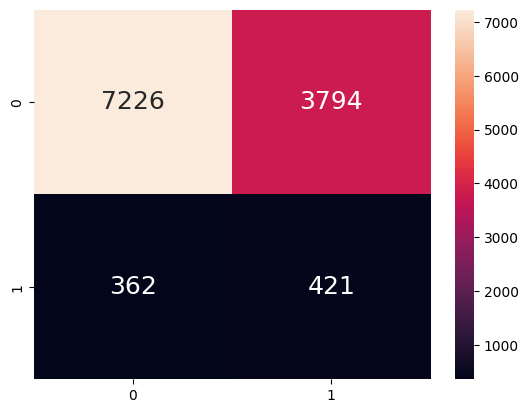

In [87]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Assume 'Grey' Zone is Failed

In [88]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole dataset

Z_pred
1    42203
0    36479
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     73462
           1       0.09      0.72      0.16      5220

    accuracy                           0.49     78682
   macro avg       0.52      0.60      0.40     78682
weighted avg       0.90      0.49      0.61     78682



<Axes: >

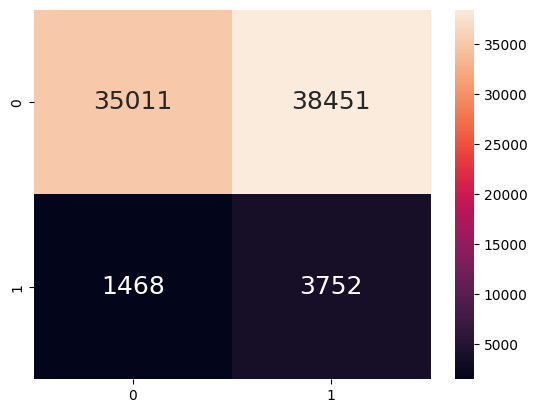

In [89]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 0 if x == 'Low' else 1)

# See class distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Testset only

Z_pred
1    6264
0    5539
Name: count, dtype: int64

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
10362,2015,alive,0.304846,0.264173,0.079361,1.228579,1.231695,2.966390,1
64208,2006,failed,0.678140,-2.484637,-0.395457,1.029008,0.187886,-3.164439,1
25229,2009,alive,0.184705,-2.409985,-0.057392,14.612968,0.335799,5.761854,0
11258,2015,alive,0.012660,0.046027,-0.063681,1.006405,0.231438,0.704763,1
72692,2011,alive,0.346267,0.102495,0.117304,0.635650,1.148085,2.475591,1


Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     11020
           1       0.09      0.71      0.16       783

    accuracy                           0.50     11803
   macro avg       0.52      0.59      0.40     11803
weighted avg       0.90      0.50      0.61     11803



<Axes: >

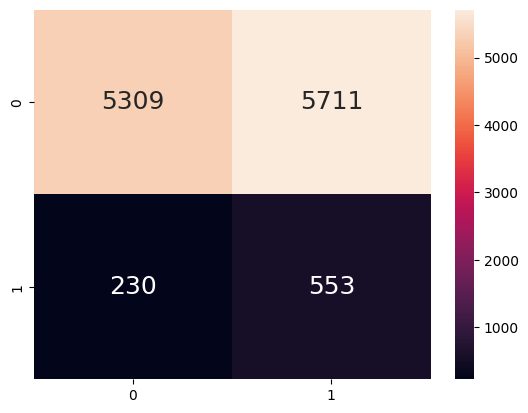

In [90]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})